In [3]:
import numpy as np
import pandas as pd
import random

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
# data=pd.read_csv("/content/drive/MyDrive/MTP Data/MTP DATA - BOD.csv")
# data = data.sample(frac = 1)

In [ ]:
data=pd.read_csv("/content/dod_1.csv")
data = data.sample(frac = 1)

In [248]:
# data.to_csv('dod_1.csv')

In [169]:
data.head(10)

,Type of Wastewater,Temperature (C),pH,VF Area (m2),HF Area (m2),HRT (d),HLR (L/m2d),Q (flow) (m3/d),Influent Conc. (mg/L),Effluent Conc. (mg/L),Removal Efficiency (%)
10,Cheese,30.0,4.30,360.00,180.0,4.000000,100.000000,17.00,1450.0,760.0,47.6
21,Sewage,23.0,NaN,13.70,18.0,1.400000,63.000000,3.00,84.0,8.0,90.0
6,Cheese,30.0,4.81,360.00,180.0,4.000000,100.000000,17.00,1592.0,717.0,55.0
27,Sewage,NaN,NaN,2.54,6.0,NaN,18.100000,8.00,191.0,11.0,94.2
5,Sewage,20.0,7.00,150.00,300.0,0.416667,41.666667,12.50,409.0,66.0,84.0
29,Tannery,8.4,NaN,0.65,1.3,12.500000,6.000000,NaN,4200.0,80.0,98.0
18,Winery,20.9,6.28,50.00,300.0,NaN,19.500000,17.30,520.0,71.0,86.0
31,Sewage,NaN,NaN,850.00,750.0,NaN,NaN,NaN,1620.0,45.0,97.0
35,Aquaculture,17.0,8.00,16.00,16.0,0.085000,1.950000,53.90,7.1,2.5,54.0
12,Landfill leachate,15.3,7.30,41.00,270.0,7.330000,50.000000,1.72,78.0,28.0,63.0


In [170]:
data.tail(10)

,Type of Wastewater,Temperature (C),pH,VF Area (m2),HF Area (m2),HRT (d),HLR (L/m2d),Q (flow) (m3/d),Influent Conc. (mg/L),Effluent Conc. (mg/L),Removal Efficiency (%)
25,Sewage,NaN,NaN,2.54,6.0,NaN,89.0,2.20,88.0,19.0,78.40
41,Domestic Wastewater,20.0,7.30,100.00,100.0,10.0,1.0,1.00,150.0,5.7,96.30
15,Winery,17.9,5.84,50.00,300.0,NaN,19.5,17.30,1339.0,441.0,67.00
0,Sewage,NaN,NaN,1500.00,750.0,2.0,NaN,184.00,72.0,5.8,92.00
36,Agriculture,22.0,7.20,100.00,100.0,10.0,1.5,1.50,200.0,9.0,95.62
40,Domestic Wastewater,20.0,7.60,10.00,10.0,10.0,1.0,1.00,250.0,42.0,84.00
9,Cheese,30.0,6.70,360.00,180.0,4.0,100.0,17.00,1350.0,750.0,44.50
26,Sewage,NaN,NaN,2.54,6.0,NaN,7.7,4.00,73.0,16.0,78.10
23,Slaughter House,12.6,NaN,10.00,15.0,NaN,15.0,0.15,2452.0,4.0,99.84
43,Domestic Wastewater,22.0,7.50,100.00,100.0,10.0,1.5,10.00,170.0,11.0,93.70


In [171]:
data.sample(5)

,Type of Wastewater,Temperature (C),pH,VF Area (m2),HF Area (m2),HRT (d),HLR (L/m2d),Q (flow) (m3/d),Influent Conc. (mg/L),Effluent Conc. (mg/L),Removal Efficiency (%)
22,Sewage,17.0,NaN,13.7,18.0,1.4,126.0,3.000,61.0,6.0,90.00
2,Sewage,NaN,NaN,0.6,1.2,NaN,240.0,0.144,420.0,30.0,93.00
44,Domestic Wastewater,25.0,7.0,50.0,50.0,5.0,2.0,1.000,180.0,10.0,94.30
36,Agriculture,22.0,7.2,100.0,100.0,10.0,1.5,1.500,200.0,9.0,95.62
23,Slaughter House,12.6,NaN,10.0,15.0,NaN,15.0,0.150,2452.0,4.0,99.84


In [172]:
data.shape

(45, 11)

In [173]:
data.describe()

,Temperature (C),pH,VF Area (m2),HF Area (m2),HRT (d),HLR (L/m2d),Q (flow) (m3/d),Influent Conc. (mg/L),Effluent Conc. (mg/L),Removal Efficiency (%)
count,34.000000,28.000000,45.000000,45.000000,30.000000,43.000000,42.000000,45.000000,45.000000,45.000000
mean,21.541176,6.701071,148.794889,164.469778,4.749833,44.352016,19.096571,698.428889,142.197778,81.357111
std,5.939754,1.194926,264.084790,217.405312,3.871176,52.136155,40.479209,1118.022907,275.554205,18.864613
min,8.400000,3.900000,0.210000,0.670000,0.085000,1.000000,0.066000,3.100000,1.900000,31.250000
25%,17.925000,6.230000,10.000000,13.300000,1.400000,2.000000,1.062500,114.000000,8.000000,78.100000
50%,22.000000,7.000000,50.000000,100.000000,4.000000,19.500000,9.000000,220.000000,19.000000,87.660000
75%,25.000000,7.400000,160.000000,216.000000,7.247500,72.835000,17.300000,859.000000,71.000000,94.800000
max,30.000000,9.110000,1500.000000,1050.000000,12.500000,240.000000,197.000000,5880.000000,1160.000000,99.840000


In [174]:
data.describe(include="all")

,Type of Wastewater,Temperature (C),pH,VF Area (m2),HF Area (m2),HRT (d),HLR (L/m2d),Q (flow) (m3/d),Influent Conc. (mg/L),Effluent Conc. (mg/L),Removal Efficiency (%)
count,45,34.000000,28.000000,45.000000,45.000000,30.000000,43.000000,42.000000,45.000000,45.000000,45.000000
unique,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Sewage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,21.541176,6.701071,148.794889,164.469778,4.749833,44.352016,19.096571,698.428889,142.197778,81.357111
std,NaN,5.939754,1.194926,264.084790,217.405312,3.871176,52.136155,40.479209,1118.022907,275.554205,18.864613
min,NaN,8.400000,3.900000,0.210000,0.670000,0.085000,1.000000,0.066000,3.100000,1.900000,31.250000
25%,NaN,17.925000,6.230000,10.000000,13.300000,1.400000,2.000000,1.062500,114.000000,8.000000,78.100000
50%,NaN,22.000000,7.000000,50.000000,100.000000,4.000000,19.500000,9.000000,220.000000,19.000000,87.660000
75%,NaN,25.000000,7.400000,160.000000,216.000000,7.247500,72.835000,17.300000,859.000000,71.000000,94.800000


In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 10 to 43
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Type of Wastewater      45 non-null     object 
 1   Temperature (C)         34 non-null     float64
 2   pH                      28 non-null     float64
 3   VF Area (m2)            45 non-null     float64
 4   HF Area (m2)            45 non-null     float64
 5   HRT (d)                 30 non-null     float64
 6   HLR (L/m2d)             43 non-null     float64
 7   Q (flow) (m3/d)         42 non-null     float64
 8   Influent Conc. (mg/L)   45 non-null     float64
 9   Effluent Conc. (mg/L)   45 non-null     float64
 10  Removal Efficiency (%)  45 non-null     float64
dtypes: float64(10), object(1)
memory usage: 4.2+ KB


In [176]:
data.isnull()

,Type of Wastewater,Temperature (C),pH,VF Area (m2),HF Area (m2),HRT (d),HLR (L/m2d),Q (flow) (m3/d),Influent Conc. (mg/L),Effluent Conc. (mg/L),Removal Efficiency (%)
10,False,False,False,False,False,False,False,False,False,False,False
21,False,False,True,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
27,False,True,True,False,False,True,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
29,False,False,True,False,False,False,False,True,False,False,False
18,False,False,False,False,False,True,False,False,False,False,False
31,False,True,True,False,False,True,True,True,False,False,False
35,False,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

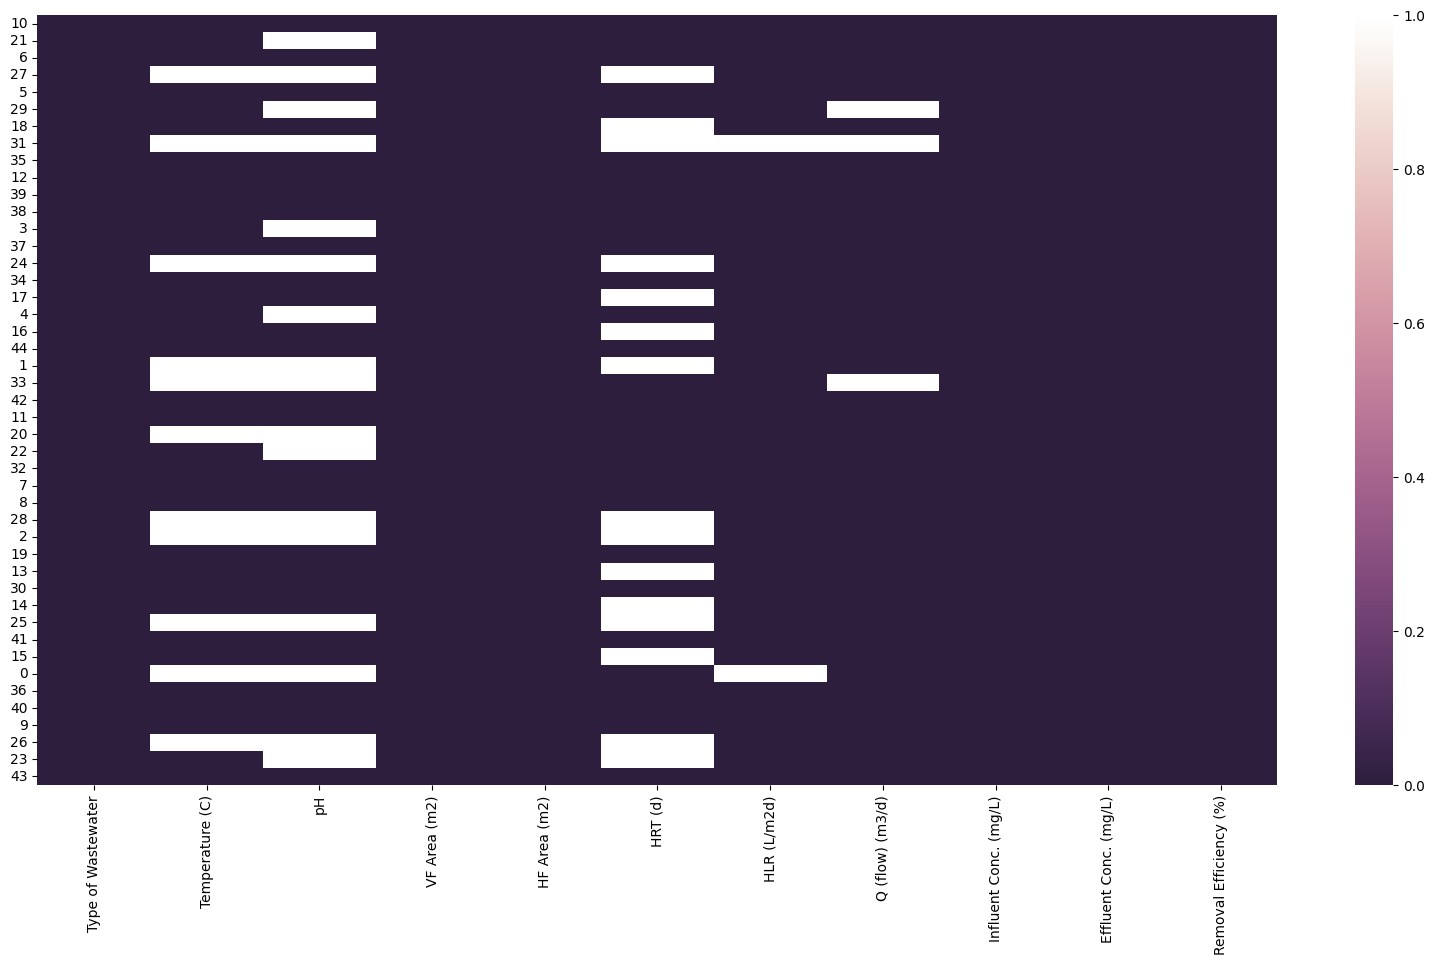

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))

cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(data.isnull(), cmap=cmap)

In [178]:
data.isnull().sum()

Type of Wastewater         0
Temperature (C)           11
pH                        17
VF Area (m2)               0
HF Area (m2)               0
HRT (d)                   15
HLR (L/m2d)                2
Q (flow) (m3/d)            3
Influent Conc. (mg/L)      0
Effluent Conc. (mg/L)      0
Removal Efficiency (%)     0
dtype: int64

In [179]:
data.dtypes

Type of Wastewater         object
Temperature (C)           float64
pH                        float64
VF Area (m2)              float64
HF Area (m2)              float64
HRT (d)                   float64
HLR (L/m2d)               float64
Q (flow) (m3/d)           float64
Influent Conc. (mg/L)     float64
Effluent Conc. (mg/L)     float64
Removal Efficiency (%)    float64
dtype: object

In [180]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<Axes: title={'center': 'Temperature (C)'}>,
        <Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'VF Area (m2)'}>],
       [<Axes: title={'center': 'HF Area (m2)'}>,
        <Axes: title={'center': 'HRT (d)'}>,
        <Axes: title={'center': 'HLR (L/m2d)'}>],
       [<Axes: title={'center': 'Q (flow) (m3/d)'}>,
        <Axes: title={'center': 'Influent Conc. (mg/L)'}>,
        <Axes: title={'center': 'Effluent Conc. (mg/L)'}>],
       [<Axes: title={'center': 'Removal Efficiency (%)'}>, <Axes: >,
        <Axes: >]], dtype=object)

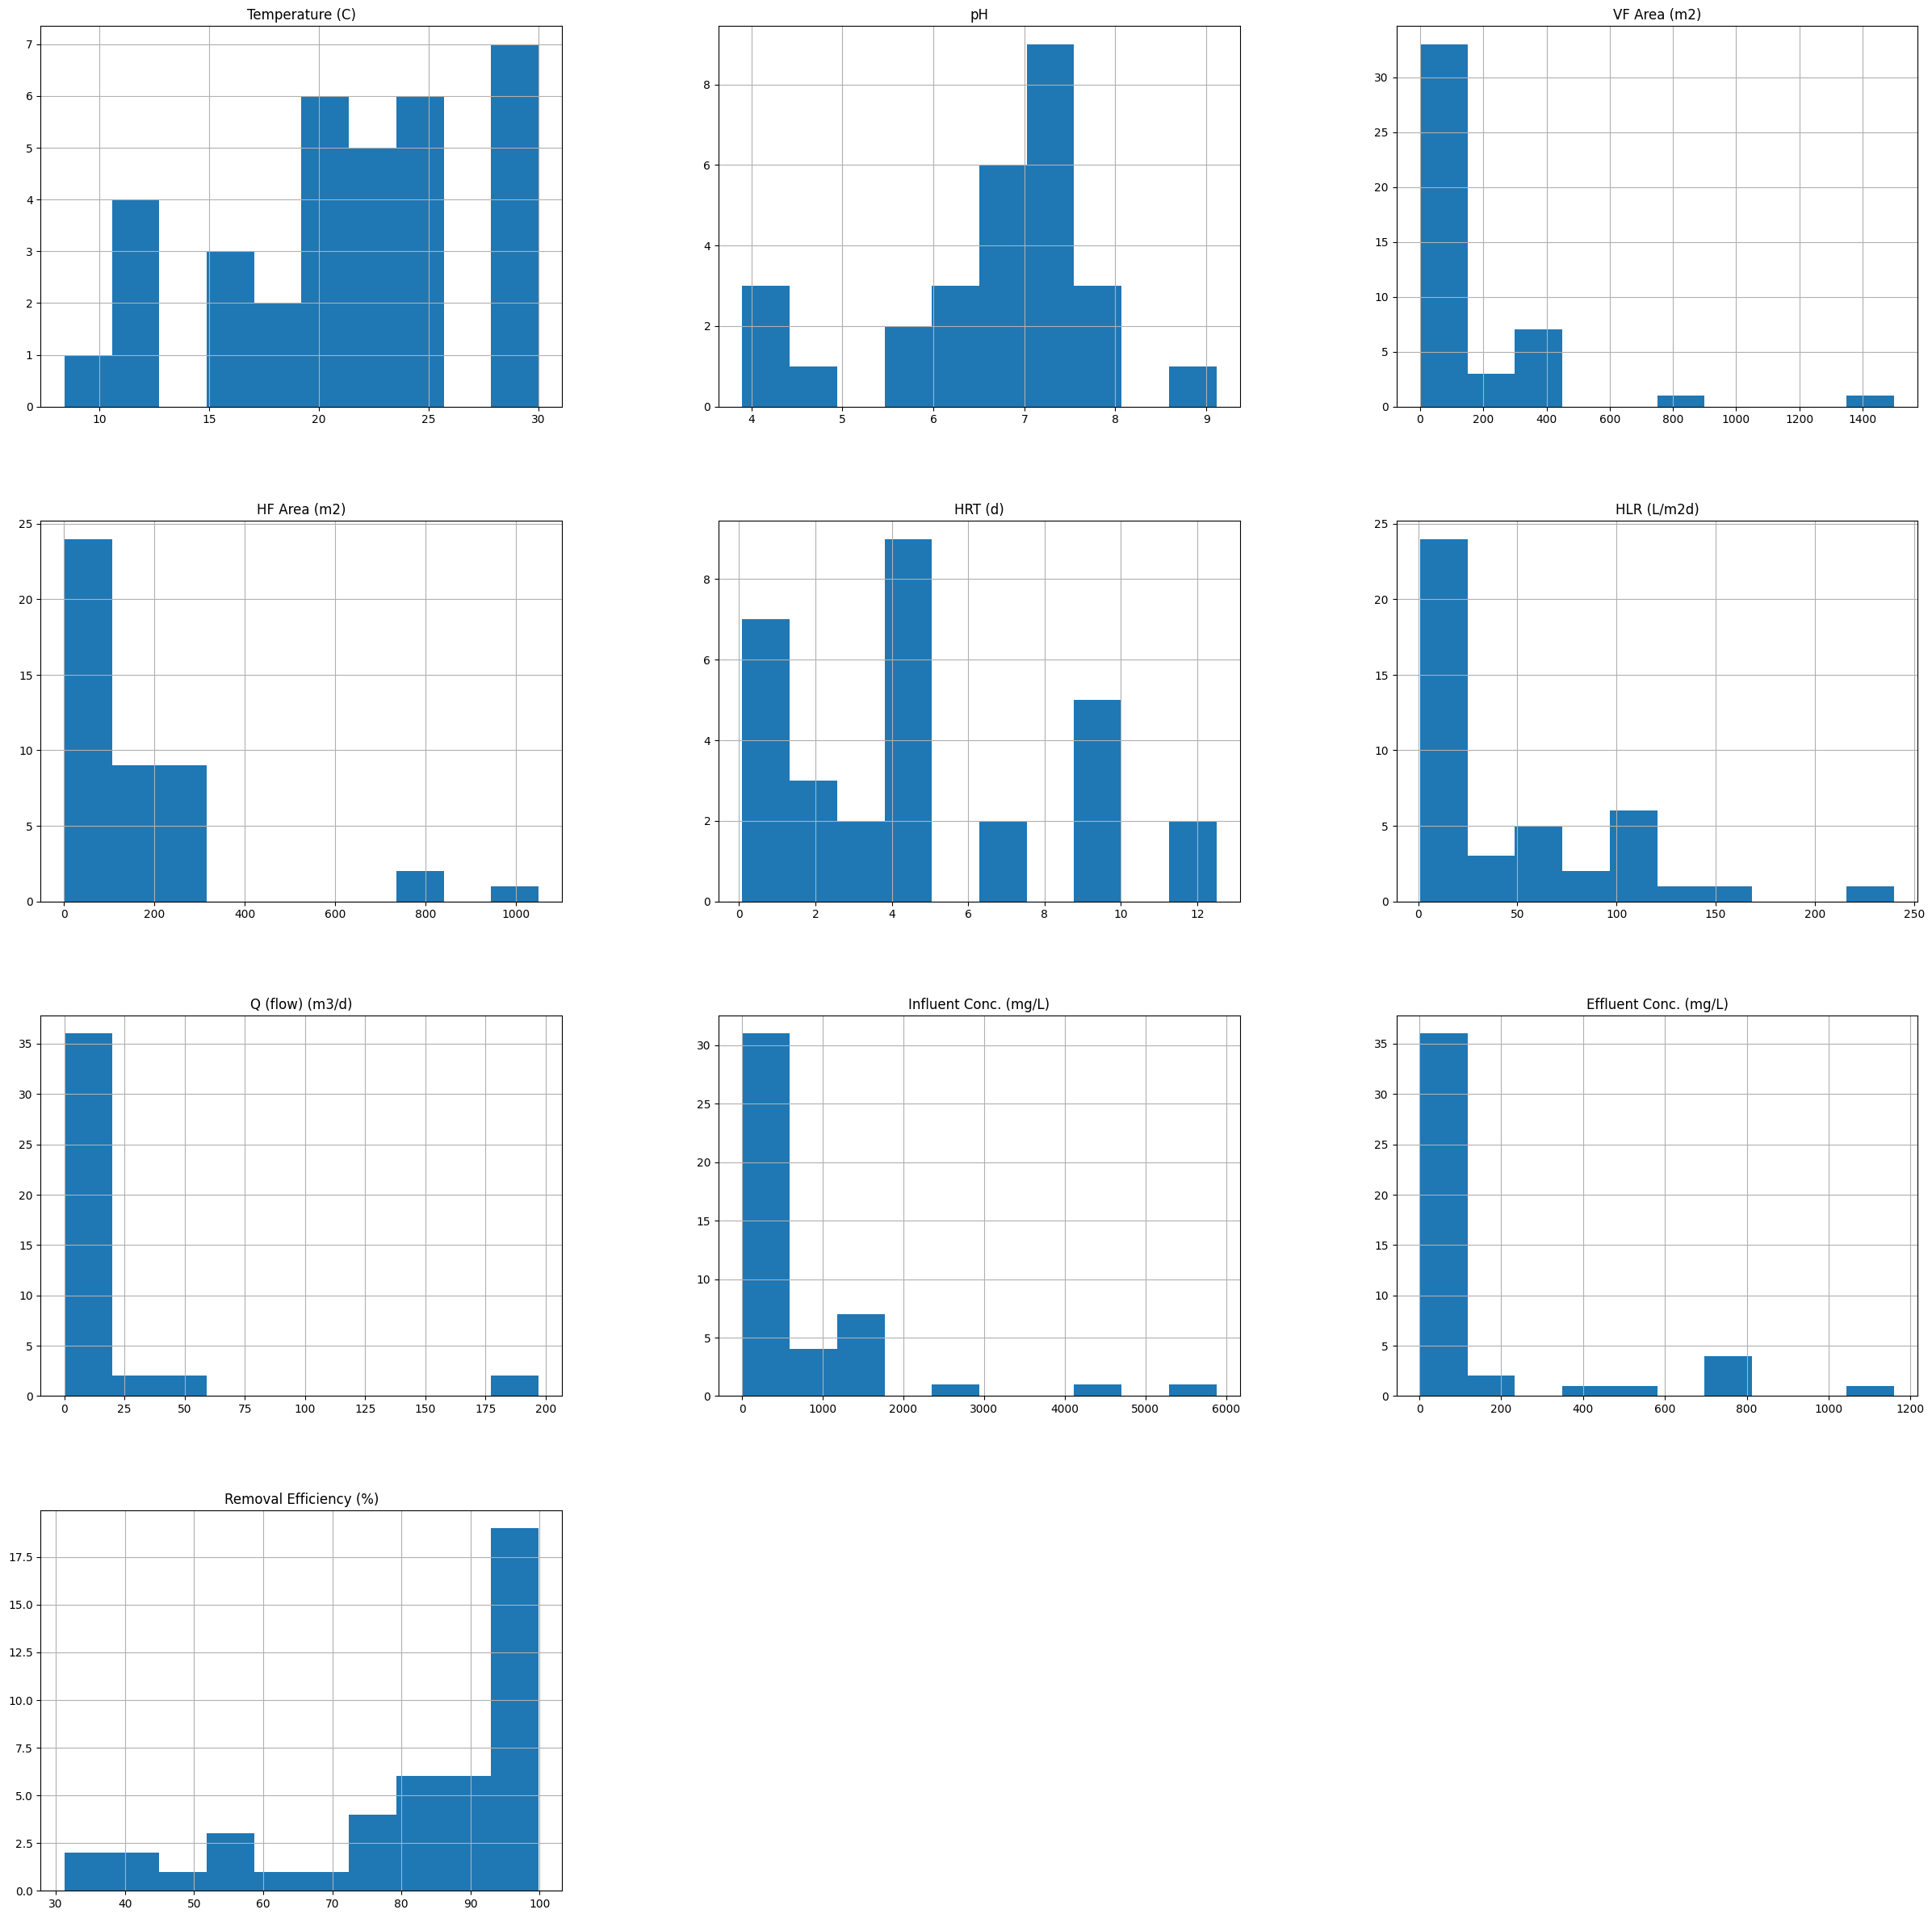

In [181]:
data.hist(figsize=(30,30))

<Axes: xlabel='Removal Efficiency (%)'>

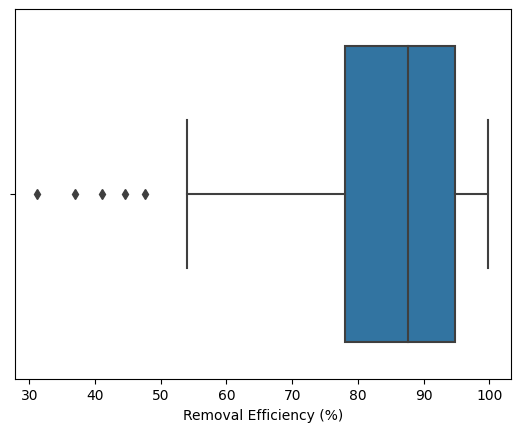

In [182]:
import seaborn as sns
sns.boxplot(x="Removal Efficiency (%)", data=data)

<Axes: xlabel='Influent Conc. (mg/L)'>

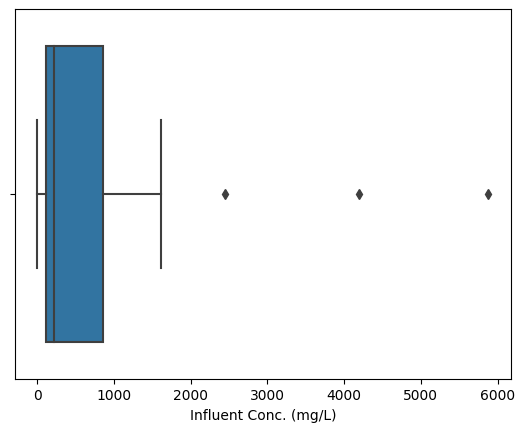

In [183]:
sns.boxplot(x="Influent Conc. (mg/L)",data=data)

<Axes: xlabel='Effluent Conc. (mg/L)'>

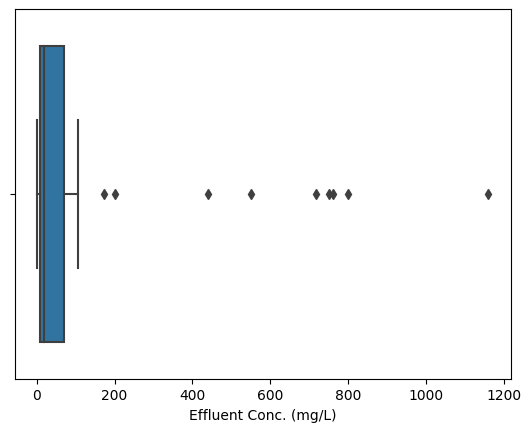

In [184]:
sns.boxplot(x="Effluent Conc. (mg/L)",data=data)

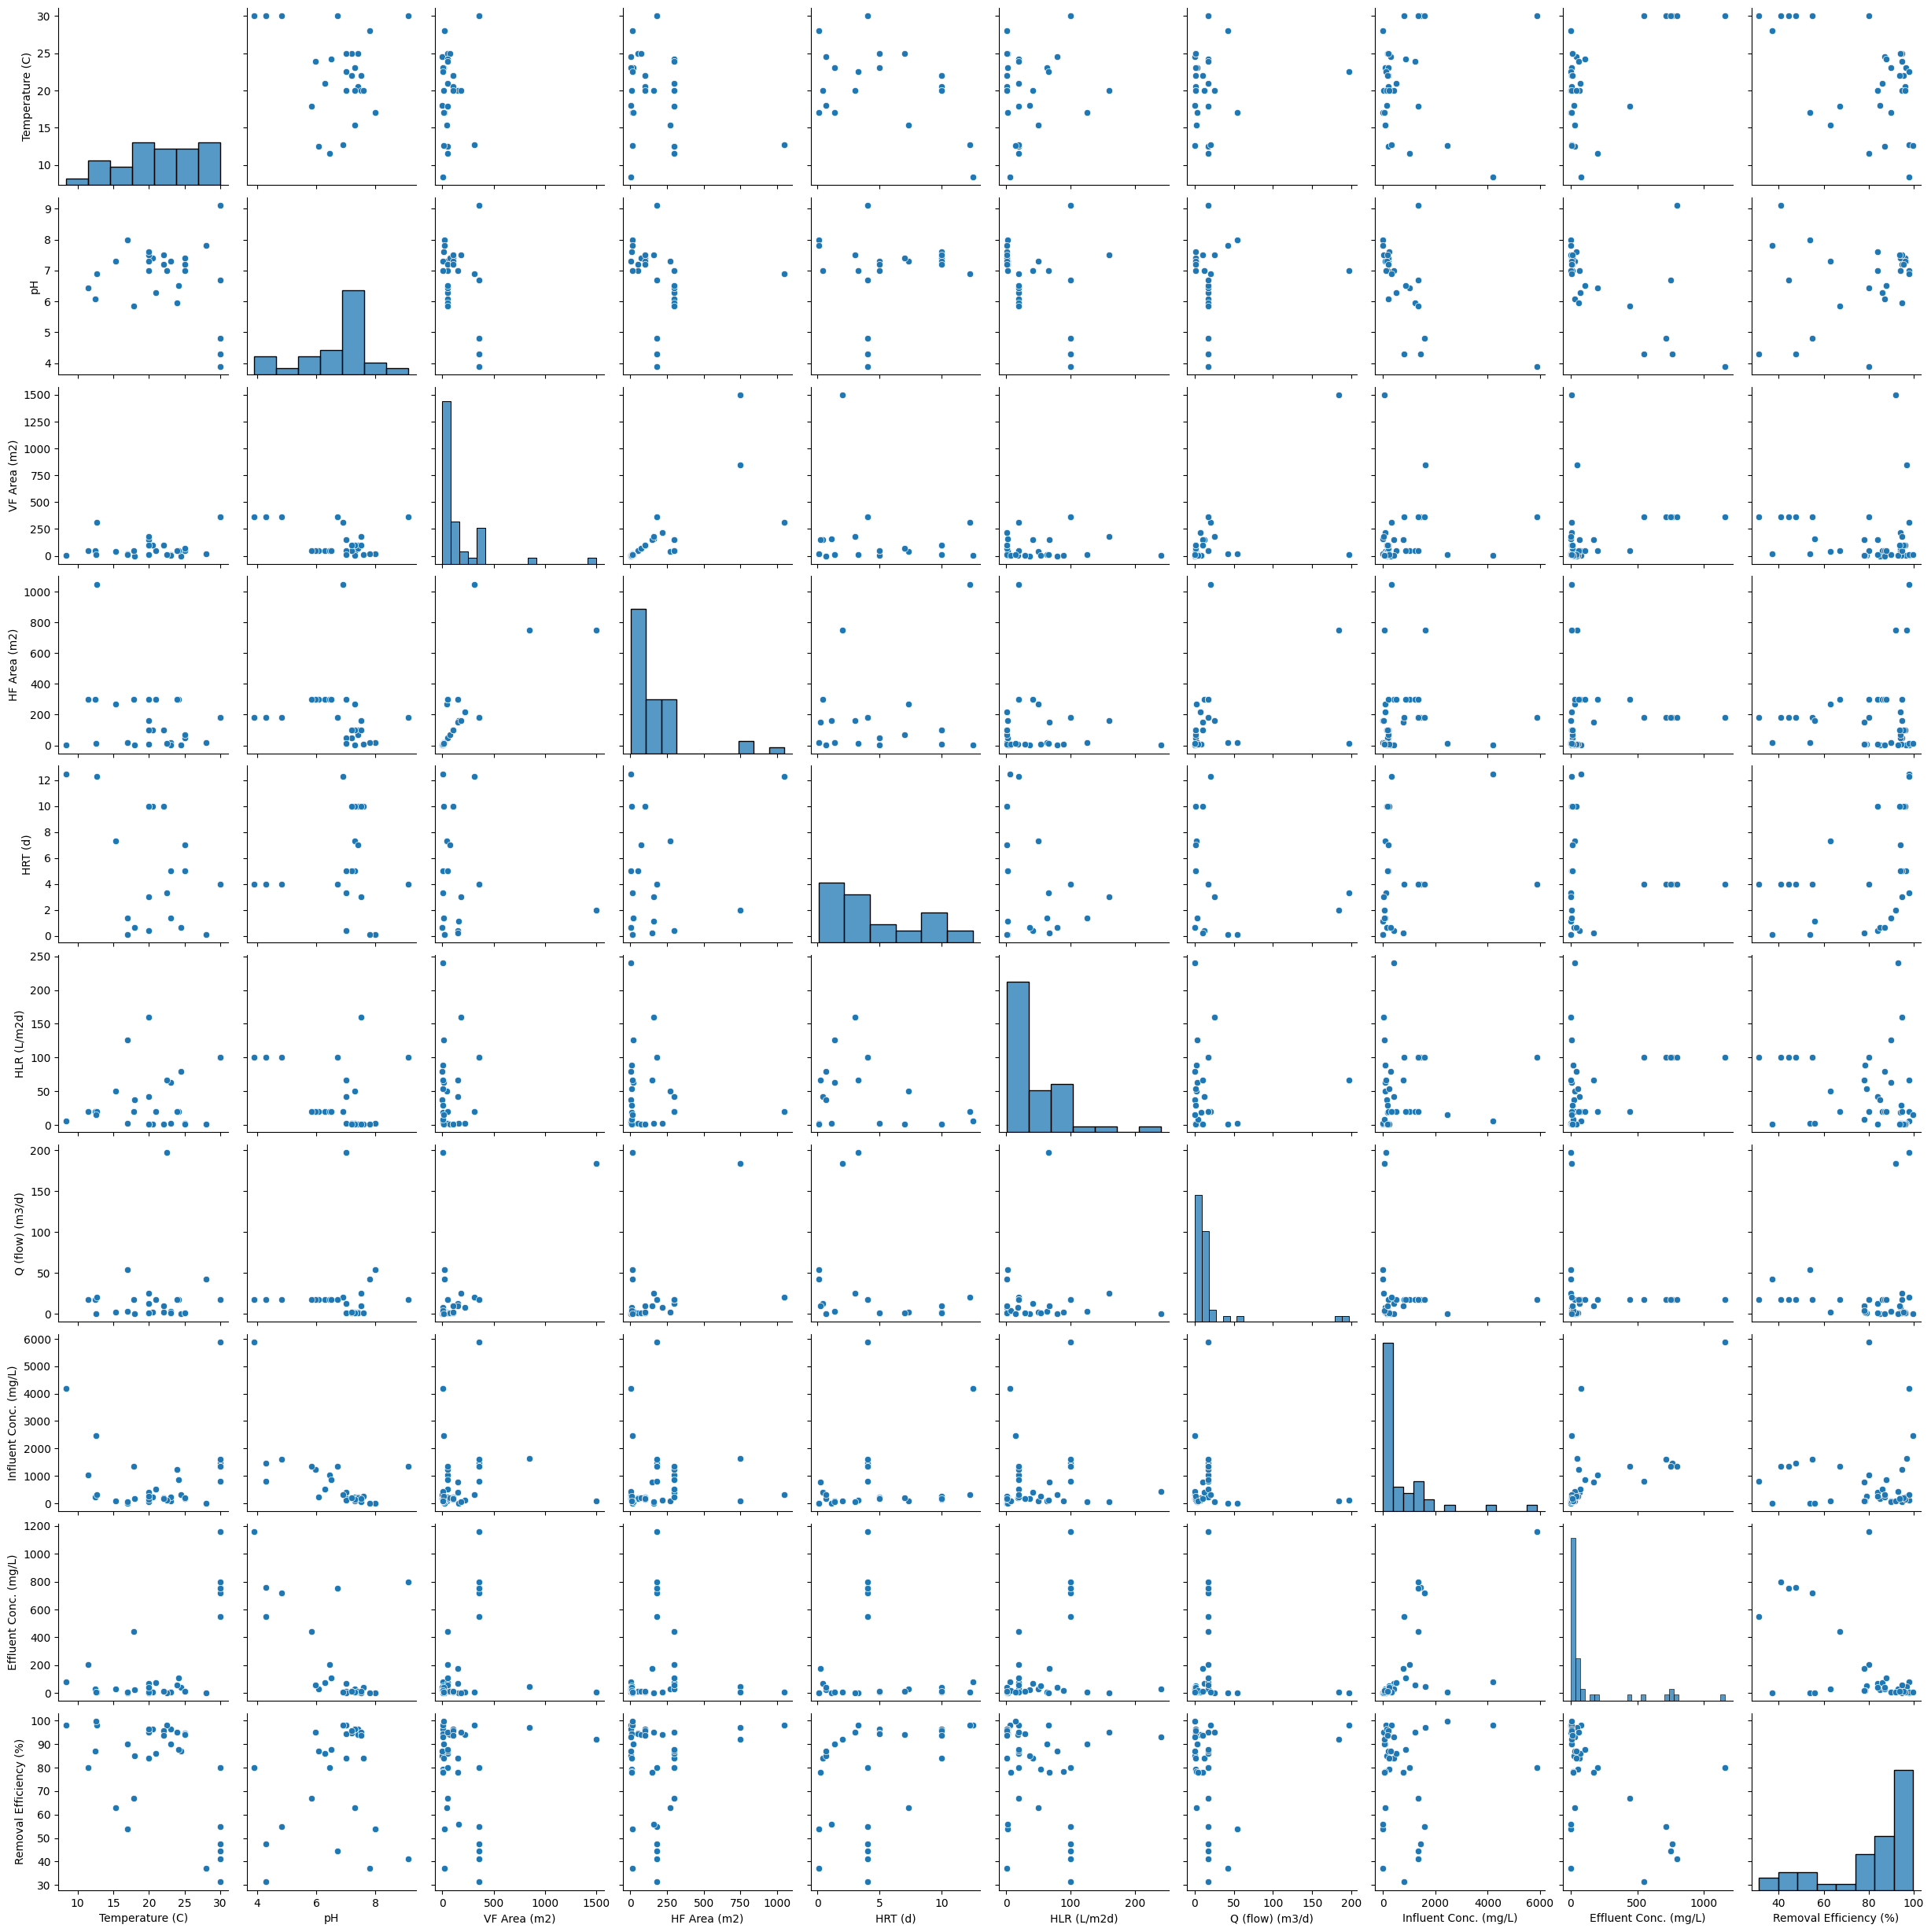

In [185]:
sns.pairplot(data)

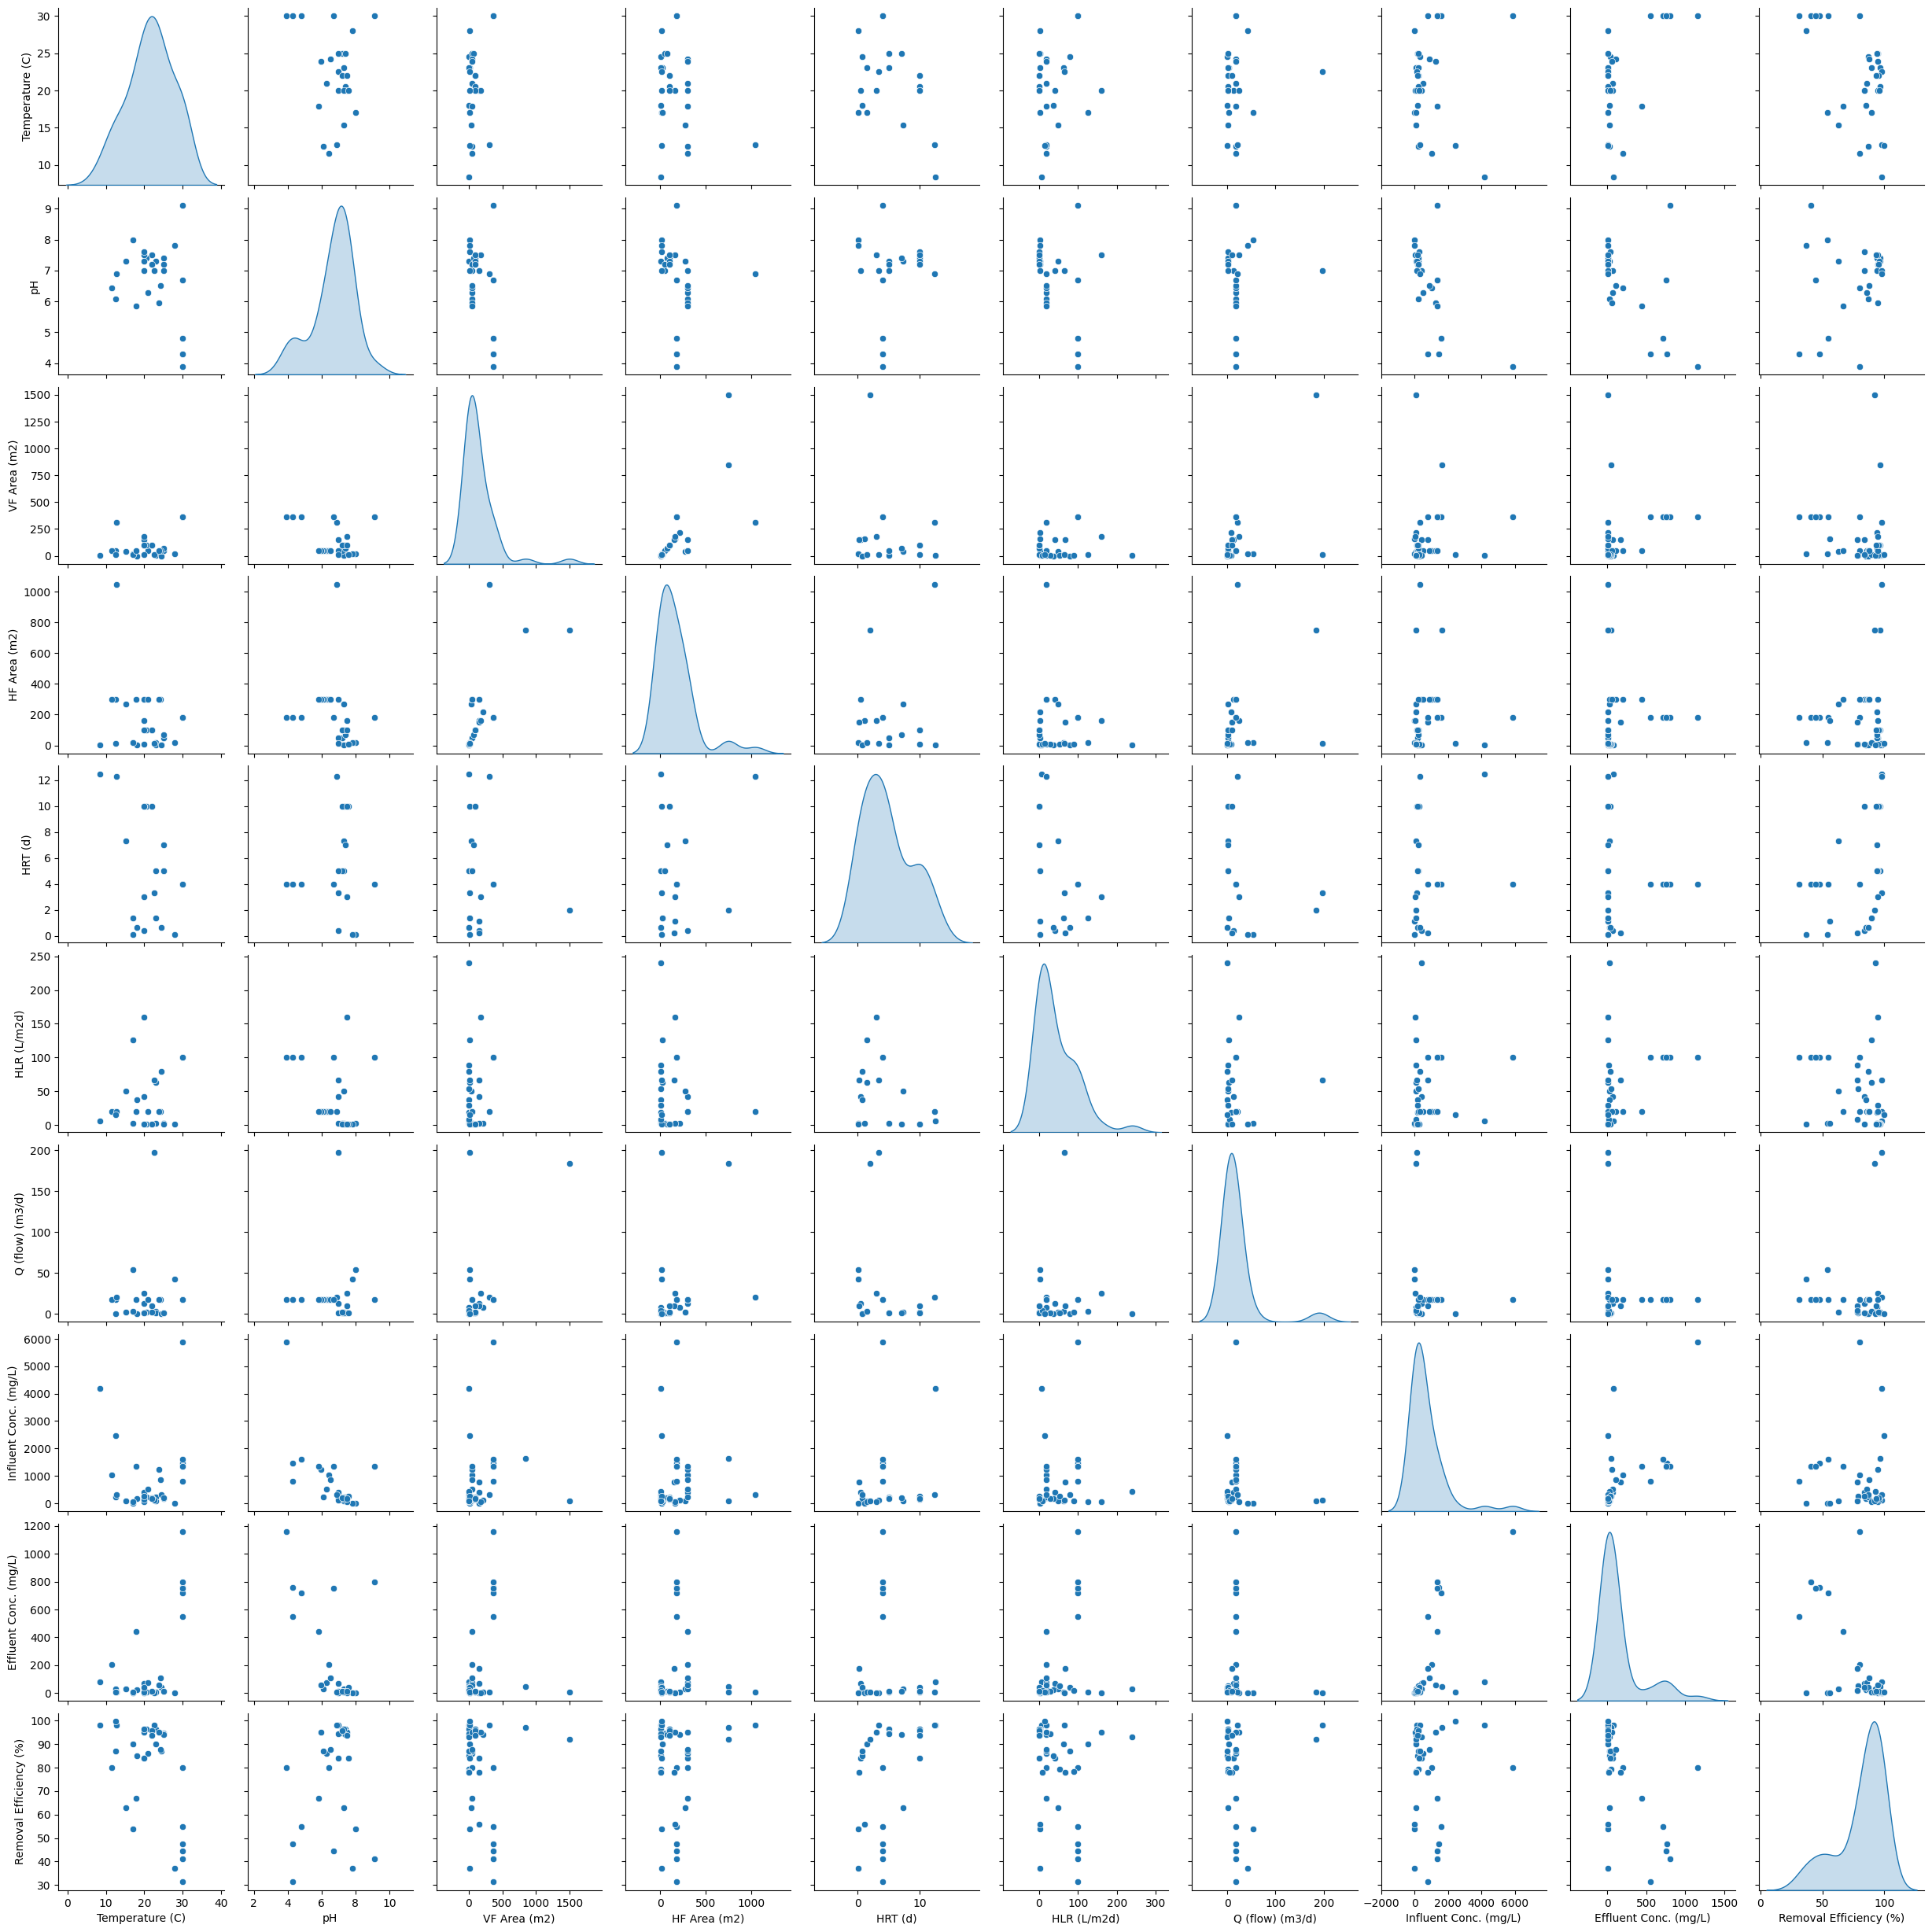

In [186]:
sns.pairplot(data,diag_kind='kde')

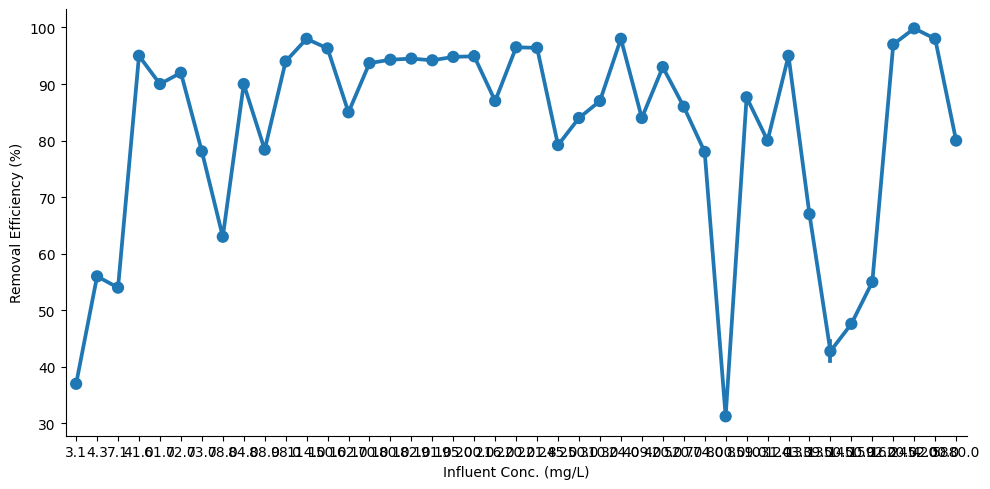

In [187]:
sns.catplot(x="Influent Conc. (mg/L)", y="Removal Efficiency (%)", kind="point", height=5, aspect=2, data=data)

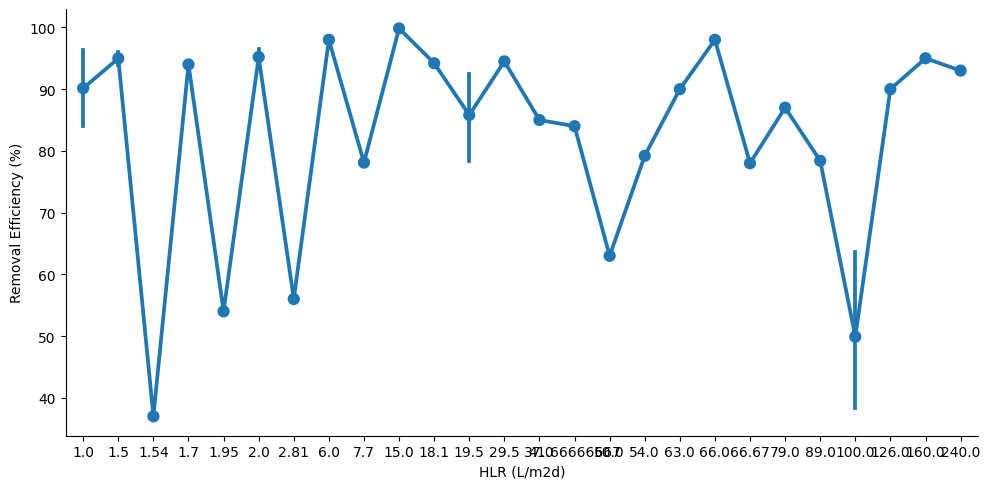

In [188]:
sns.catplot(x="HLR (L/m2d)", y="Removal Efficiency (%)", kind="point", aspect = 2 , data=data)

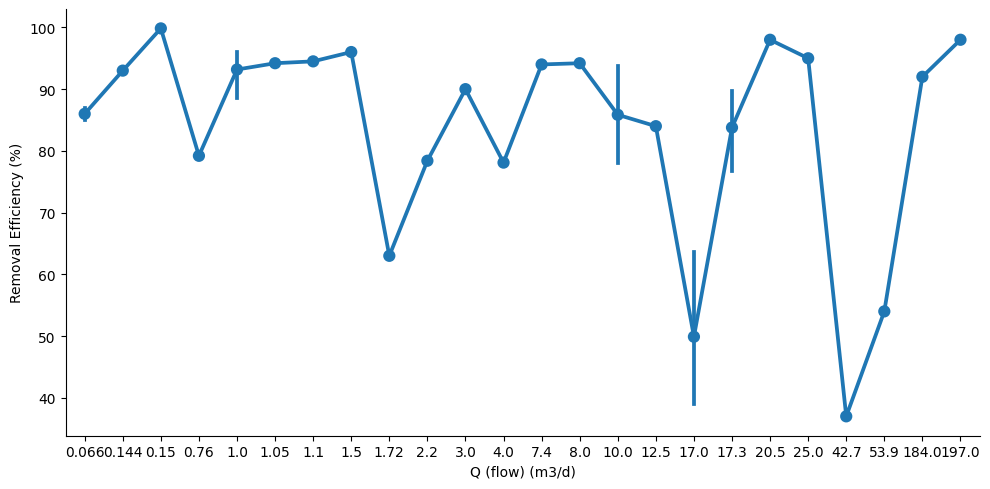

In [189]:
sns.catplot(x="Q (flow) (m3/d)", y="Removal Efficiency (%)", kind="point", aspect = 2 , data=data)

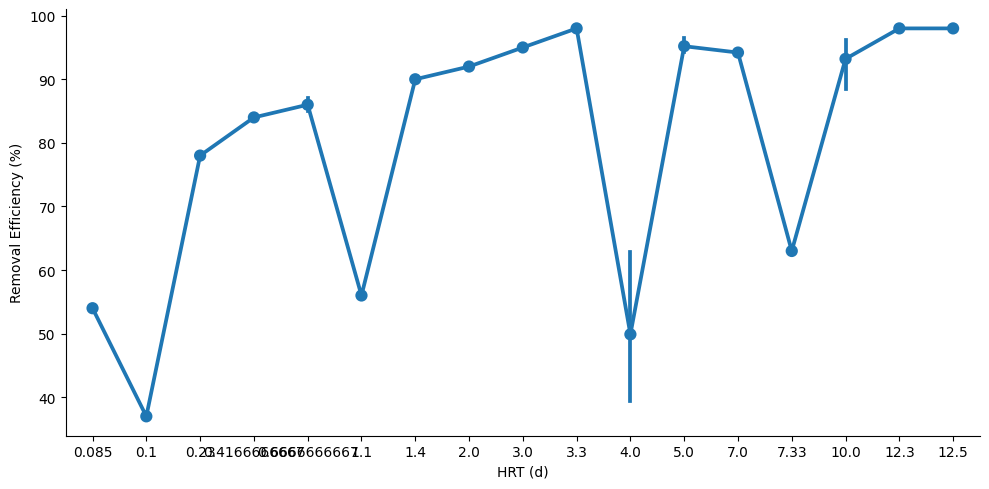

In [190]:
sns.catplot(x="HRT (d)", y="Removal Efficiency (%)", kind="point", aspect = 2 , data=data)

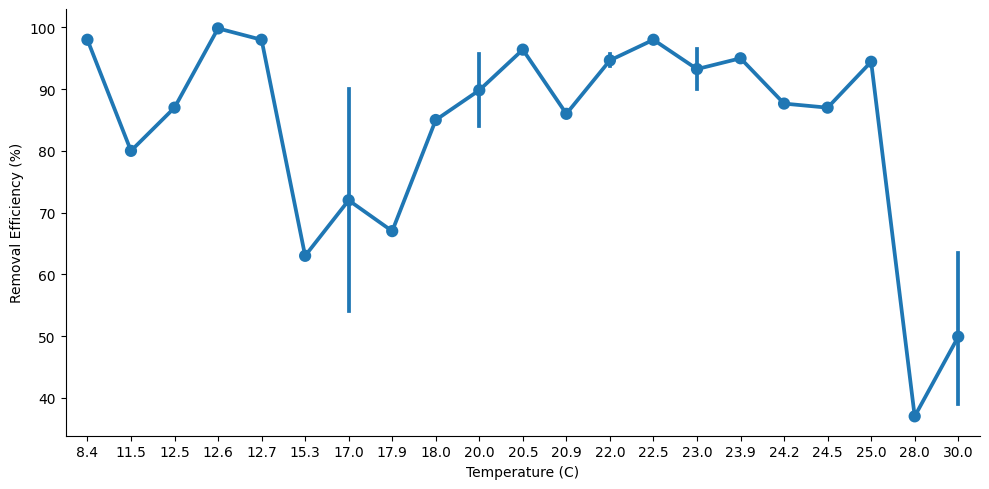

In [191]:
sns.catplot(x="Temperature (C)", y="Removal Efficiency (%)", kind="point", aspect=2 , data=data)

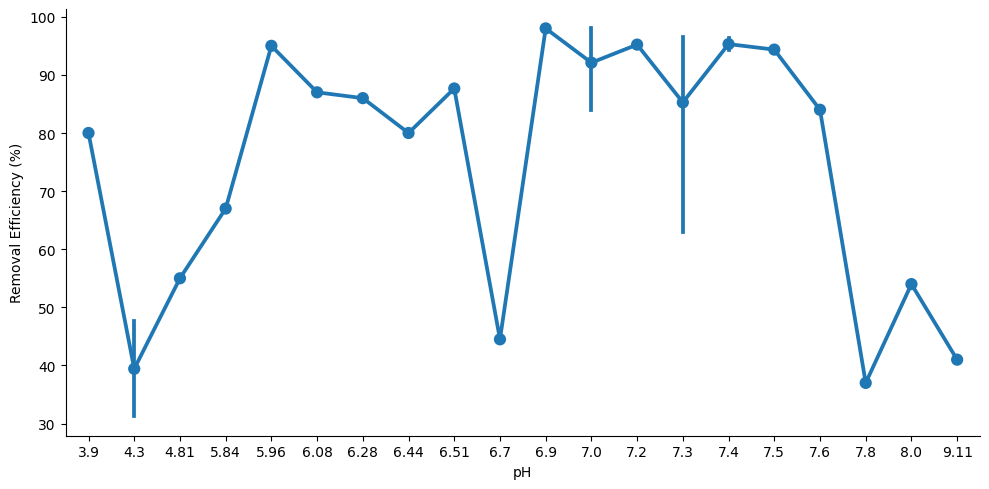

In [192]:
sns.catplot(x="pH", y="Removal Efficiency (%)", kind="point", aspect=2 , data=data)

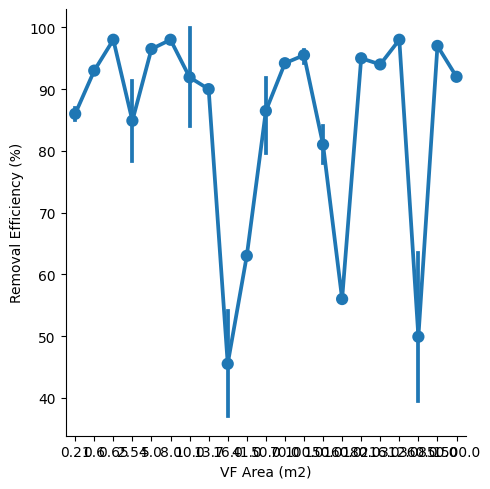

In [193]:
sns.catplot(x="VF Area (m2)", y="Removal Efficiency (%)", kind="point" , data=data)

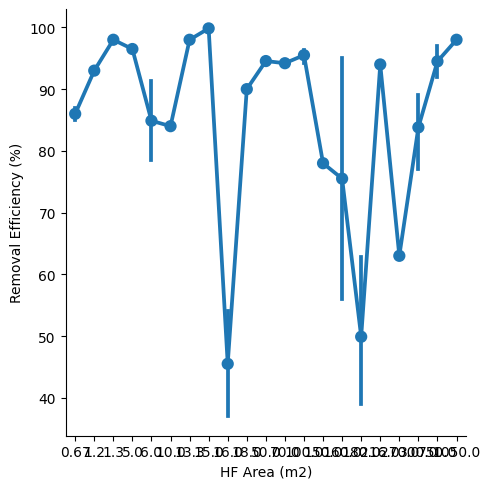

In [194]:
sns.catplot(x="HF Area (m2)", y="Removal Efficiency (%)", kind="point" , data=data)

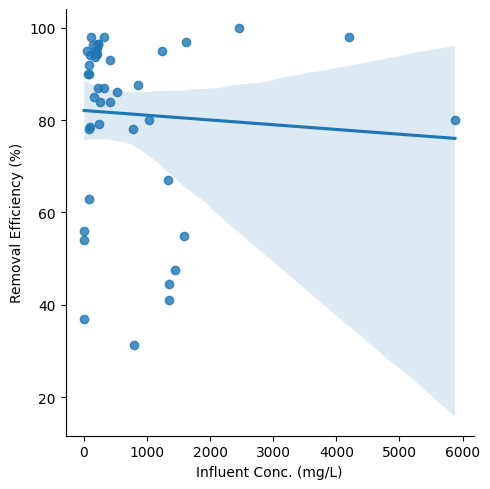

In [195]:
sns.lmplot(x="Influent Conc. (mg/L)", y="Removal Efficiency (%)", data=data);

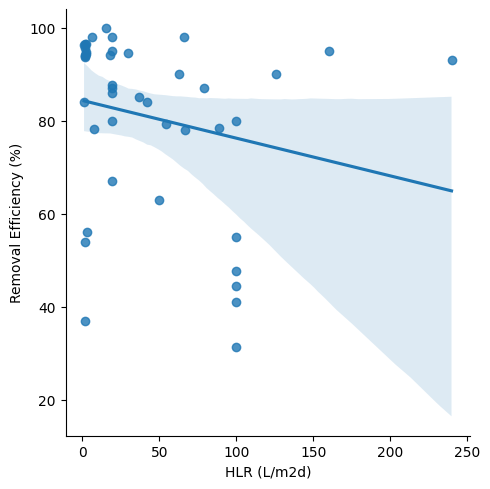

In [196]:
sns.lmplot(x="HLR (L/m2d)", y="Removal Efficiency (%)", data=data);

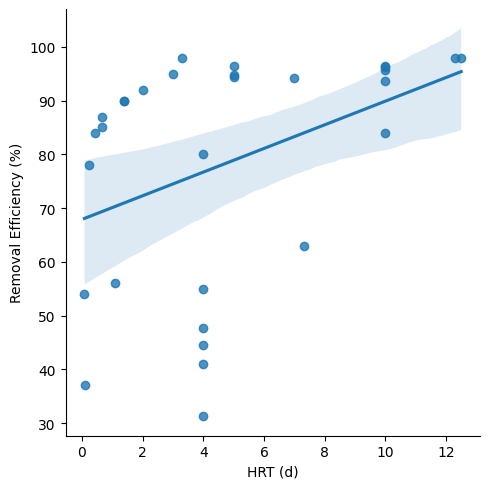

In [197]:
sns.lmplot(x="HRT (d)", y="Removal Efficiency (%)", data=data);

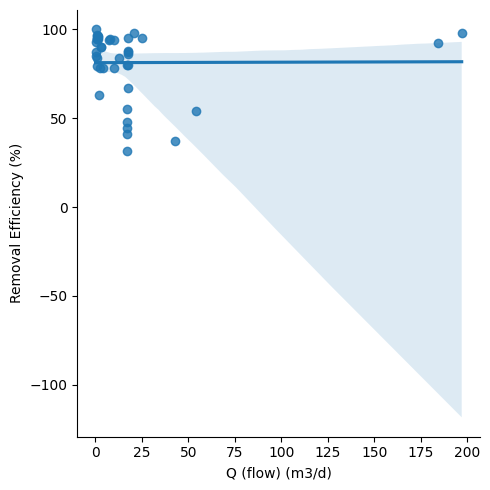

In [198]:
sns.lmplot(x="Q (flow) (m3/d)", y="Removal Efficiency (%)", data=data);

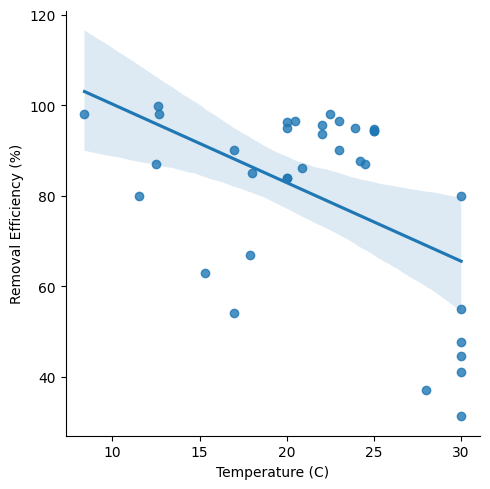

In [199]:
sns.lmplot(x="Temperature (C)", y="Removal Efficiency (%)", data=data);

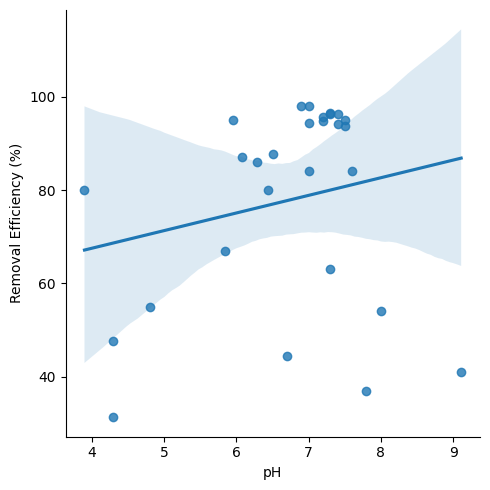

In [200]:
sns.lmplot(x="pH", y="Removal Efficiency (%)", data=data);

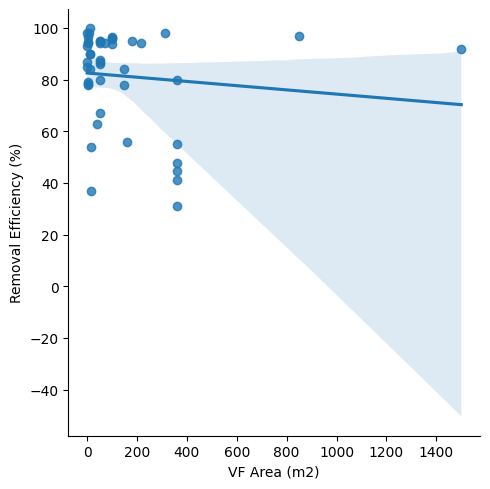

In [201]:
sns.lmplot(x="VF Area (m2)", y="Removal Efficiency (%)", data=data);

In [202]:
data

,Type of Wastewater,Temperature (C),pH,VF Area (m2),HF Area (m2),HRT (d),HLR (L/m2d),Q (flow) (m3/d),Influent Conc. (mg/L),Effluent Conc. (mg/L),Removal Efficiency (%)
10,Cheese,30.0,4.30,360.00,180.00,4.000000,100.000000,17.000,1450.0,760.0,47.60
21,Sewage,23.0,NaN,13.70,18.00,1.400000,63.000000,3.000,84.0,8.0,90.00
6,Cheese,30.0,4.81,360.00,180.00,4.000000,100.000000,17.000,1592.0,717.0,55.00
27,Sewage,NaN,NaN,2.54,6.00,NaN,18.100000,8.000,191.0,11.0,94.20
5,Sewage,20.0,7.00,150.00,300.00,0.416667,41.666667,12.500,409.0,66.0,84.00
29,Tannery,8.4,NaN,0.65,1.30,12.500000,6.000000,NaN,4200.0,80.0,98.00
18,Winery,20.9,6.28,50.00,300.00,NaN,19.500000,17.300,520.0,71.0,86.00
31,Sewage,NaN,NaN,850.00,750.00,NaN,NaN,NaN,1620.0,45.0,97.00
35,Aquaculture,17.0,8.00,16.00,16.00,0.085000,1.950000,53.900,7.1,2.5,54.00
12,Landfill leachate,15.3,7.30,41.00,270.00,7.330000,50.000000,1.720,78.0,28.0,63.00


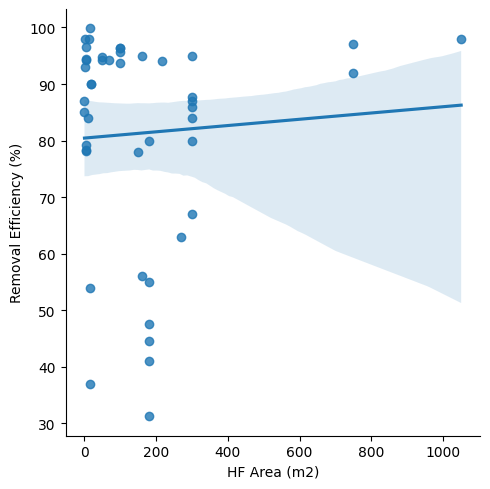

In [203]:
sns.lmplot(x="HF Area (m2)", y="Removal Efficiency (%)", data=data);

In [204]:
corr=data.corr()
corr

<ipython-input-204-0d3ae1d0be10>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


,Temperature (C),pH,VF Area (m2),HF Area (m2),HRT (d),HLR (L/m2d),Q (flow) (m3/d),Influent Conc. (mg/L),Effluent Conc. (mg/L),Removal Efficiency (%)
Temperature (C),1.000000,-0.291895,0.548282,-0.205427,-0.398654,0.386217,0.046491,0.055602,0.581752,-0.501274
pH,-0.291895,1.000000,-0.466927,-0.188391,0.121049,-0.383370,0.037138,-0.629780,-0.582742,0.207628
VF Area (m2),0.548282,-0.466927,1.000000,0.672411,-0.107281,0.322188,0.556277,0.153562,0.278823,-0.114347
HF Area (m2),-0.205427,-0.188391,0.672411,1.000000,0.197990,-0.072873,0.302369,0.064444,0.068087,0.063953
HRT (d),-0.398654,0.121049,-0.107281,0.197990,1.000000,-0.418518,-0.237127,0.162703,-0.104479,0.392514
HLR (L/m2d),0.386217,-0.383370,0.322188,-0.072873,-0.418518,1.000000,0.053806,0.144296,0.397501,-0.221300
Q (flow) (m3/d),0.046491,0.037138,0.556277,0.302369,-0.237127,0.053806,1.000000,-0.074202,-0.039230,0.005735
Influent Conc. (mg/L),0.055602,-0.629780,0.153562,0.064444,0.162703,0.144296,-0.074202,1.000000,0.648661,-0.060844
Effluent Conc. (mg/L),0.581752,-0.582742,0.278823,0.068087,-0.104479,0.397501,-0.039230,0.648661,1.000000,-0.590286
Removal Efficiency (%),-0.501274,0.207628,-0.114347,0.063953,0.392514,-0.221300,0.005735,-0.060844,-0.590286,1.000000


<Axes: >

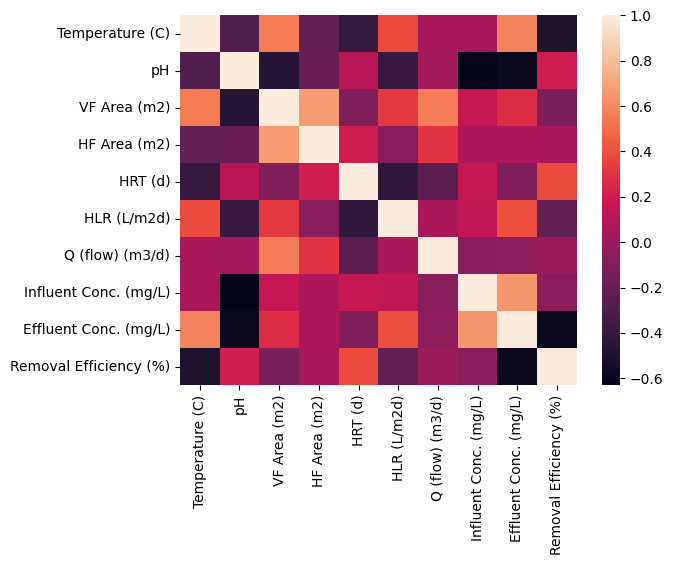

In [205]:
sns.heatmap(corr)

<Axes: >

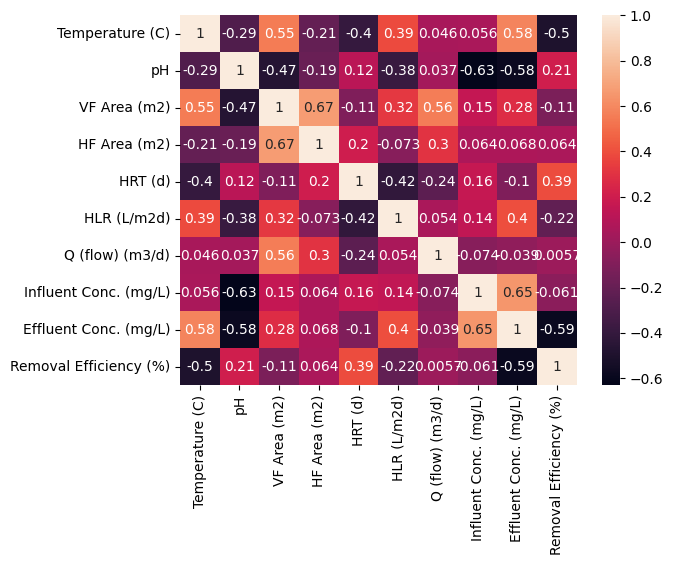

In [206]:
sns.heatmap(corr,annot=True)

In [207]:
data.head()

,Type of Wastewater,Temperature (C),pH,VF Area (m2),HF Area (m2),HRT (d),HLR (L/m2d),Q (flow) (m3/d),Influent Conc. (mg/L),Effluent Conc. (mg/L),Removal Efficiency (%)
10,Cheese,30.0,4.30,360.00,180.0,4.000000,100.000000,17.0,1450.0,760.0,47.6
21,Sewage,23.0,NaN,13.70,18.0,1.400000,63.000000,3.0,84.0,8.0,90.0
6,Cheese,30.0,4.81,360.00,180.0,4.000000,100.000000,17.0,1592.0,717.0,55.0
27,Sewage,NaN,NaN,2.54,6.0,NaN,18.100000,8.0,191.0,11.0,94.2
5,Sewage,20.0,7.00,150.00,300.0,0.416667,41.666667,12.5,409.0,66.0,84.0


In [208]:
data.isnull().sum()

Type of Wastewater         0
Temperature (C)           11
pH                        17
VF Area (m2)               0
HF Area (m2)               0
HRT (d)                   15
HLR (L/m2d)                2
Q (flow) (m3/d)            3
Influent Conc. (mg/L)      0
Effluent Conc. (mg/L)      0
Removal Efficiency (%)     0
dtype: int64

In [209]:
features=['Temperature (C)','pH','HRT (d)','HLR (L/m2d)','Q (flow) (m3/d)']

for feature in features:
  data[feature].fillna(data[feature].median(),inplace=True)

In [210]:
data.isnull().sum()

Type of Wastewater        0
Temperature (C)           0
pH                        0
VF Area (m2)              0
HF Area (m2)              0
HRT (d)                   0
HLR (L/m2d)               0
Q (flow) (m3/d)           0
Influent Conc. (mg/L)     0
Effluent Conc. (mg/L)     0
Removal Efficiency (%)    0
dtype: int64

<Axes: xlabel='Influent Conc. (mg/L)'>

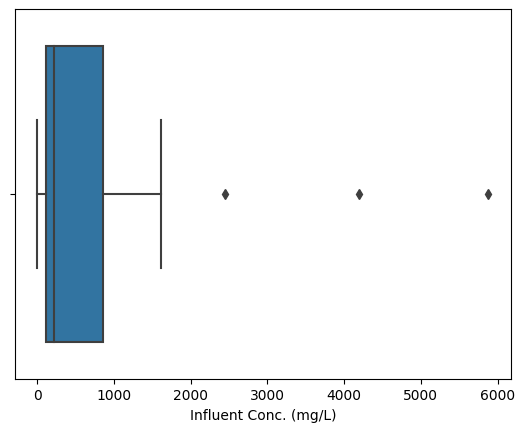

In [211]:
import seaborn as sns
sns.boxplot(x="Influent Conc. (mg/L)", data=data)

In [212]:
data['Influent Conc. (mg/L)'].describe()

count      45.000000
mean      698.428889
std      1118.022907
min         3.100000
25%       114.000000
50%       220.000000
75%       859.000000
max      5880.000000
Name: Influent Conc. (mg/L), dtype: float64

In [213]:
df1=data[data['Influent Conc. (mg/L)']>8000]
df2=data[data['Influent Conc. (mg/L)']<=8000]

df1['Influent Conc. (mg/L)']=8000
data=pd.concat([df1,df2])

<Axes: xlabel='Influent Conc. (mg/L)'>

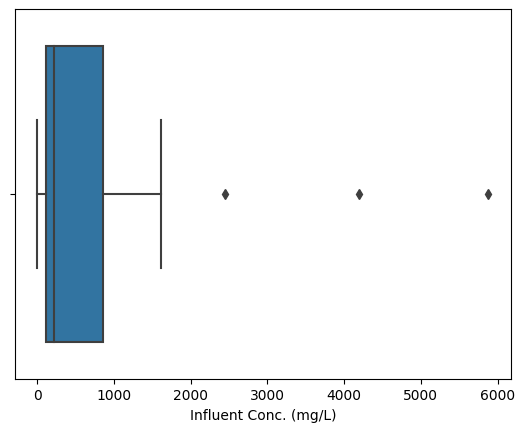

In [214]:
sns.boxplot(x="Influent Conc. (mg/L)", data=data)

In [215]:
df1=data.copy()

In [216]:
df1.dtypes

Type of Wastewater         object
Temperature (C)           float64
pH                        float64
VF Area (m2)              float64
HF Area (m2)              float64
HRT (d)                   float64
HLR (L/m2d)               float64
Q (flow) (m3/d)           float64
Influent Conc. (mg/L)     float64
Effluent Conc. (mg/L)     float64
Removal Efficiency (%)    float64
dtype: object

In [217]:
df1.dropna(subset=['Effluent Conc. (mg/L)'],inplace=True)

In [218]:
df1

,Type of Wastewater,Temperature (C),pH,VF Area (m2),HF Area (m2),HRT (d),HLR (L/m2d),Q (flow) (m3/d),Influent Conc. (mg/L),Effluent Conc. (mg/L),Removal Efficiency (%)
10,Cheese,30.0,4.30,360.00,180.00,4.000000,100.000000,17.000,1450.0,760.0,47.60
21,Sewage,23.0,7.00,13.70,18.00,1.400000,63.000000,3.000,84.0,8.0,90.00
6,Cheese,30.0,4.81,360.00,180.00,4.000000,100.000000,17.000,1592.0,717.0,55.00
27,Sewage,22.0,7.00,2.54,6.00,4.000000,18.100000,8.000,191.0,11.0,94.20
5,Sewage,20.0,7.00,150.00,300.00,0.416667,41.666667,12.500,409.0,66.0,84.00
29,Tannery,8.4,7.00,0.65,1.30,12.500000,6.000000,9.000,4200.0,80.0,98.00
18,Winery,20.9,6.28,50.00,300.00,4.000000,19.500000,17.300,520.0,71.0,86.00
31,Sewage,22.0,7.00,850.00,750.00,4.000000,19.500000,9.000,1620.0,45.0,97.00
35,Aquaculture,17.0,8.00,16.00,16.00,0.085000,1.950000,53.900,7.1,2.5,54.00
12,Landfill leachate,15.3,7.30,41.00,270.00,7.330000,50.000000,1.720,78.0,28.0,63.00


In [219]:
one_hot_encoded_data = pd.get_dummies(df1, columns = ['Type of Wastewater'])
df1.drop(['Type of Wastewater'],axis=1,inplace=True)
df1 = df1.merge(one_hot_encoded_data)

In [220]:
df1.drop(['Type of Wastewater_Agriculture '],axis=1,inplace=True)

In [221]:
df1.columns

Index(['Temperature (C)', 'pH', 'VF Area (m2)', 'HF Area (m2)', 'HRT (d)',
       'HLR (L/m2d)', 'Q (flow) (m3/d)', 'Influent Conc. (mg/L)',
       'Effluent Conc. (mg/L)', 'Removal Efficiency (%)',
       'Type of Wastewater_Aquaculture', 'Type of Wastewater_Cheese',
       'Type of Wastewater_Domestic Wastewater',
       'Type of Wastewater_Landfill leachate', 'Type of Wastewater_Sewage',
       'Type of Wastewater_Slaughter House', 'Type of Wastewater_Tannery',
       'Type of Wastewater_Winery'],
      dtype='object')

In [222]:
n = int(len(df1)*.9)-1
print(n)
df2=df1[:n]
x=df2.drop(['Effluent Conc. (mg/L)','Removal Efficiency (%)'],axis=1)
y=df2['Removal Efficiency (%)']
df3=df1[n:]
x1=df3.drop(['Effluent Conc. (mg/L)','Removal Efficiency (%)'],axis=1)
y1=df3['Removal Efficiency (%)']

39


In [223]:
#Data processing functions
from sklearn.model_selection import train_test_split
#Regressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [224]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [225]:
lm = LinearRegression() # Creating a Linear Regression object 'lm'
lm.fit(x_train,y_train)
predictions = lm.predict(x1)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y1,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y1,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y1,predictions)))
print("R-squared value of predictions:",round(metrics.r2_score(y1,predictions),3))

Mean absolute error (MAE): 14.294278566748568
Mean square error (MSE): 234.93578339061062
Root mean square error (RMSE): 15.32761505879537
R-squared value of predictions: 0.317


In [226]:
predictions_1 = lm.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_1))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_1))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_1)))
print("R-squared value of validation:",round(metrics.r2_score(y_test,predictions_1),3))

Mean absolute error (MAE): 10.349506737785127
Mean square error (MSE): 214.54661437930972
Root mean square error (RMSE): 14.647409818097865
R-squared value of validation: 0.646


In [227]:
from sklearn.svm import SVR

In [228]:
SVM = SVR(kernel="linear")
SVM.fit(x_train,y_train)
predictions = SVM.predict(x1)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y1,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y1,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y1,predictions)))
print("R-squared value of predictions:",round(metrics.r2_score(y1,predictions),3))

Mean absolute error (MAE): 14.196319777147322
Mean square error (MSE): 383.32178872214894
Root mean square error (RMSE): 19.57860538246146
R-squared value of predictions: -0.114


In [229]:
predictions_2 = SVM.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_2))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_2))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_2)))
print("R-squared value of validation:",round(metrics.r2_score(y_test,predictions_2),3))

Mean absolute error (MAE): 16.1909710498068
Mean square error (MSE): 632.9067200754147
Root mean square error (RMSE): 25.15763741044486
R-squared value of validation: -0.045


In [230]:
from sklearn.ensemble import RandomForestRegressor

In [231]:
Model1 = RandomForestRegressor(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(x_train,y_train)
predictions = Model1.predict(x1)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y1,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y1,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y1,predictions)))
print("R-squared value of predictions:",round(metrics.r2_score(y1,predictions),3))

Mean absolute error (MAE): 10.841833333333348
Mean square error (MSE): 223.3205918117362
Root mean square error (RMSE): 14.94391487568556
R-squared value of predictions: 0.351


In [232]:
predictions_3 = Model1.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_3))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_3))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_3)))
print("R-squared value of validation:",round(metrics.r2_score(y_test,predictions_3),3))

Mean absolute error (MAE): 11.89650499999994
Mean square error (MSE): 259.7081300973651
Root mean square error (RMSE): 16.11546245372329
R-squared value of validation: 0.571


In [233]:
from sklearn.ensemble import GradientBoostingRegressor

In [234]:
Model2 = GradientBoostingRegressor()
Model2.fit(x_train,y_train)
predictions = Model2.predict(x1)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y1,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y1,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y1,predictions)))
print("R-squared value of predictions:",round(metrics.r2_score(y1,predictions),3))

Mean absolute error (MAE): 11.597183276669645
Mean square error (MSE): 290.29329902770036
Root mean square error (RMSE): 17.037995745618097
R-squared value of predictions: 0.156


In [235]:
predictions_4 = Model2.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_4))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_4))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_4)))
print("R-squared value of validation:",round(metrics.r2_score(y_test,predictions_4),3))

Mean absolute error (MAE): 11.47931970087087
Mean square error (MSE): 271.83648571254645
Root mean square error (RMSE): 16.487464502237646
R-squared value of validation: 0.551


In [236]:
from sklearn.tree import DecisionTreeRegressor

In [237]:
Model3 = DecisionTreeRegressor( max_depth=100,
 max_features=1.0, max_leaf_nodes=10,min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 random_state=27, splitter='best')
Model3.fit(x_train,y_train)
predictions = Model3.predict(x1)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y1,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y1,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y1,predictions)))
print("R-squared value of predictions:",round(metrics.r2_score(y1,predictions),3))

Mean absolute error (MAE): 12.702222222222224
Mean square error (MSE): 372.0251407407406
Root mean square error (RMSE): 19.287953254317593
R-squared value of predictions: -0.082


In [238]:
predictions_5 = Model3.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_5))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_5))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_5)))
print("R-squared value of validation:",round(metrics.r2_score(y_test,predictions_5),3))

Mean absolute error (MAE): 16.511388888888888
Mean square error (MSE): 549.8704453703704
Root mean square error (RMSE): 23.449316522456904
R-squared value of validation: 0.092


In [239]:
from sklearn.ensemble import AdaBoostRegressor

In [240]:
Model4 = AdaBoostRegressor()
Model4.fit(x_train,y_train)
y_pred = Model4.predict(x_test)
predictions = Model4.predict(x1)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y1,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y1,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y1,predictions)))
print("R-squared value of predictions:",round(metrics.r2_score(y1,predictions),3))

Mean absolute error (MAE): 10.752561274509809
Mean square error (MSE): 206.53148555453438
Root mean square error (RMSE): 14.371203343997829
R-squared value of predictions: 0.4


In [241]:
predictions_6 = Model4.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_6))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_6))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_6)))
print("R-squared value of validation:",round(metrics.r2_score(y_test,predictions_6),3))

Mean absolute error (MAE): 9.530654310966812
Mean square error (MSE): 175.38305588678267
Root mean square error (RMSE): 13.243226792847077
R-squared value of validation: 0.71


In [242]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=16, kernel_initializer='normal', activation='ELU'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
#model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(x_train, y_train ,batch_size = 5, epochs = 400, verbose=1)

Epoch 1/400
6/6 [==============================] - 1s 3ms/step - loss: 7576.4404
Epoch 2/400
6/6 [==============================] - 0s 2ms/step - loss: 7440.8340
Epoch 3/400
6/6 [==============================] - 0s 2ms/step - loss: 7315.7793
Epoch 4/400
6/6 [==============================] - 0s 2ms/step - loss: 7223.0347
Epoch 5/400
6/6 [==============================] - 0s 2ms/step - loss: 7156.7031
Epoch 6/400
6/6 [==============================] - 0s 3ms/step - loss: 7100.0249
Epoch 7/400
6/6 [==============================] - 0s 2ms/step - loss: 7057.5615
Epoch 8/400
6/6 [==============================] - 0s 2ms/step - loss: 7012.2524
Epoch 9/400
6/6 [==============================] - 0s 2ms/step - loss: 6966.3594
Epoch 10/400
6/6 [==============================] - 0s 3ms/step - loss: 6888.9028
Epoch 11/400
6/6 [==============================] - 0s 2ms/step - loss: 6781.7979
Epoch 12/400
6/6 [==============================] - 0s 4ms/step - loss: 6614.1406
Epoch 13/400
6/6 [=======

In [243]:
predictions = model.predict(x1)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y1,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y1,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y1,predictions)))
print("R-squared value of predictions:",round(metrics.r2_score(y1,predictions),3))

1/1 [==============================] - 0s 107ms/step
Mean absolute error (MAE): 14.069628041585288
Mean square error (MSE): 362.1427517064199
Root mean square error (RMSE): 19.030048652234704
R-squared value of predictions: -0.053


In [244]:
predictions_7 = model.predict(x_test)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions_7))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions_7))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions_7)))
print("R-squared value of validation:",round(metrics.r2_score(y_test,predictions_7),3))

1/1 [==============================] - 0s 31ms/step
Mean absolute error (MAE): 19.627819697062176
Mean square error (MSE): 574.2350585274618
Root mean square error (RMSE): 23.963202175991874
R-squared value of validation: 0.052


[Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Actual'),
 Text(0.5, 1.0, 'Adaptive Boosting')]

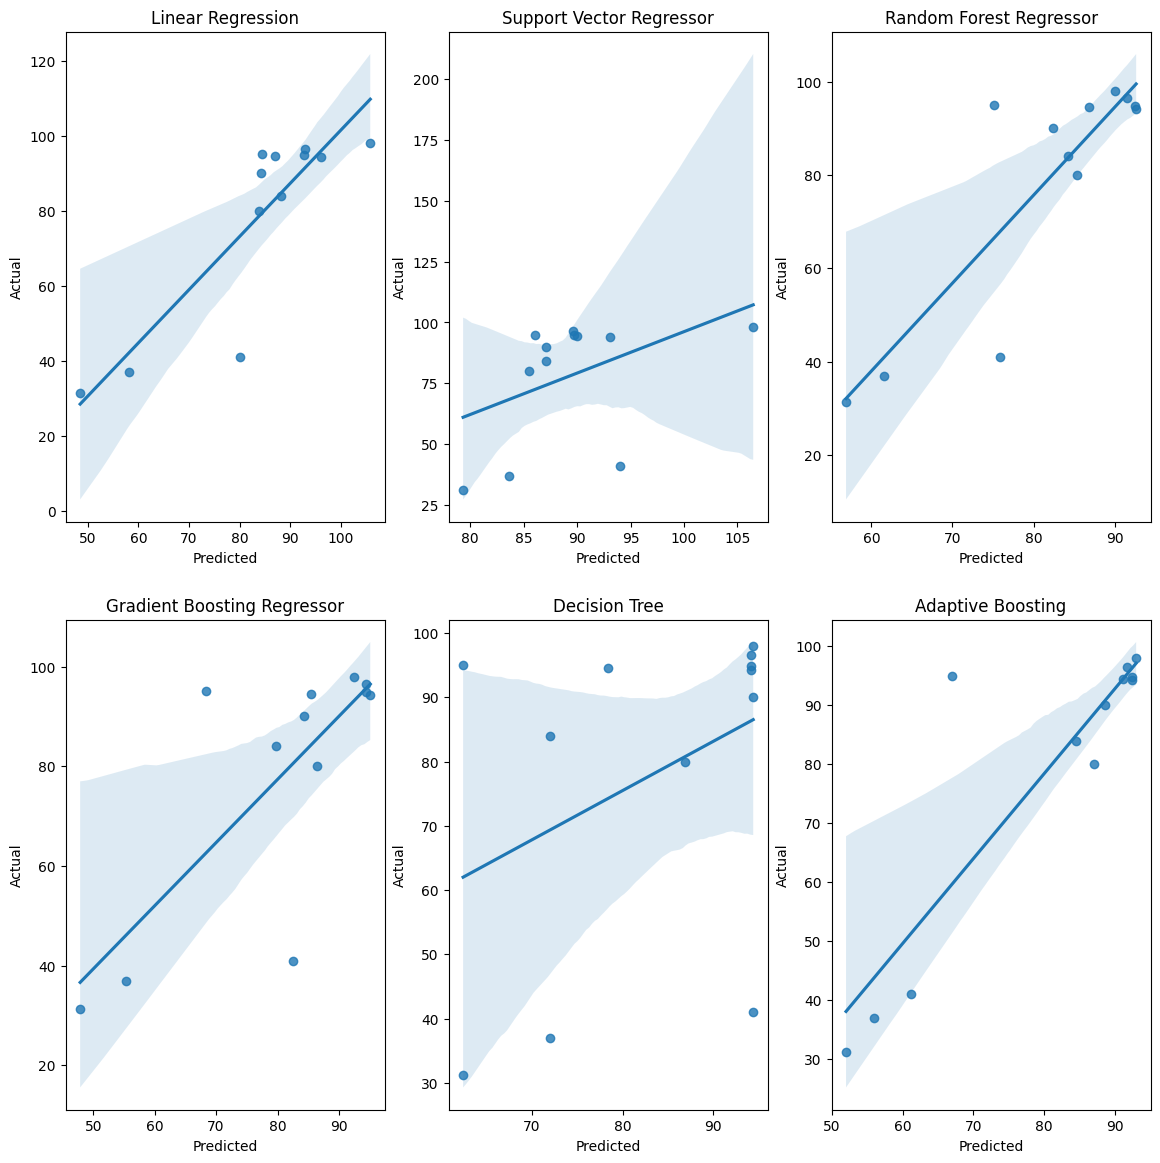

In [245]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6))= plt.subplots(nrows=2, ncols=3, figsize=(14,14))
ax = sns.regplot(x=predictions_1, y=y_test, scatter= True, fit_reg= True,ax=ax1)
ax.set(xlabel='Predicted',ylabel='Actual',title='Linear Regression')

ax = sns.regplot(x=predictions_2, y=y_test, scatter= True, fit_reg= True,ax=ax2)
ax.set(xlabel='Predicted',ylabel='Actual',title='Support Vector Regressor')

ax = sns.regplot(x=predictions_3, y=y_test, scatter= True, fit_reg= True, ax=ax3)
ax.set(xlabel='Predicted',ylabel='Actual',title='Random Forest Regressor')

ax = sns.regplot(x=predictions_4, y=y_test, scatter= True, fit_reg= True, ax=ax4)
ax.set(xlabel='Predicted',ylabel='Actual',title='Gradient Boosting Regressor')

ax = sns.regplot(x=predictions_5, y=y_test, scatter= True, fit_reg= True, ax=ax5)
ax.set(xlabel='Predicted',ylabel='Actual',title='Decision Tree')

ax = sns.regplot(x=predictions_6, y=y_test, scatter= True, fit_reg= True, ax=ax6)
ax.set(xlabel='Predicted',ylabel='Actual',title='Adaptive Boosting')

Temperature (C) -> 0.047391402406490896
pH -> 0.2500046004376712
VF Area (m2) -> 0.03407673841182781
HF Area (m2) -> 0.059654480865495955
HRT (d) -> 0.05068127531554658
HLR (L/m2d) -> 0.05443998983103284
Q (flow) (m3/d) -> 0.07224329311121475
Influent Conc. (mg/L) -> 0.15066444468340096
Type of Wastewater_Aquaculture -> 0.09629871256636877
Type of Wastewater_Cheese -> 0.034473994928793154
Type of Wastewater_Domestic Wastewater -> 0.0
Type of Wastewater_Landfill leachate -> 0.03728058933559354
Type of Wastewater_Sewage -> 0.10612128473429927
Type of Wastewater_Slaughter House -> 0.0
Type of Wastewater_Tannery -> 0.0004374871754140468
Type of Wastewater_Winery -> 0.006231706196850155


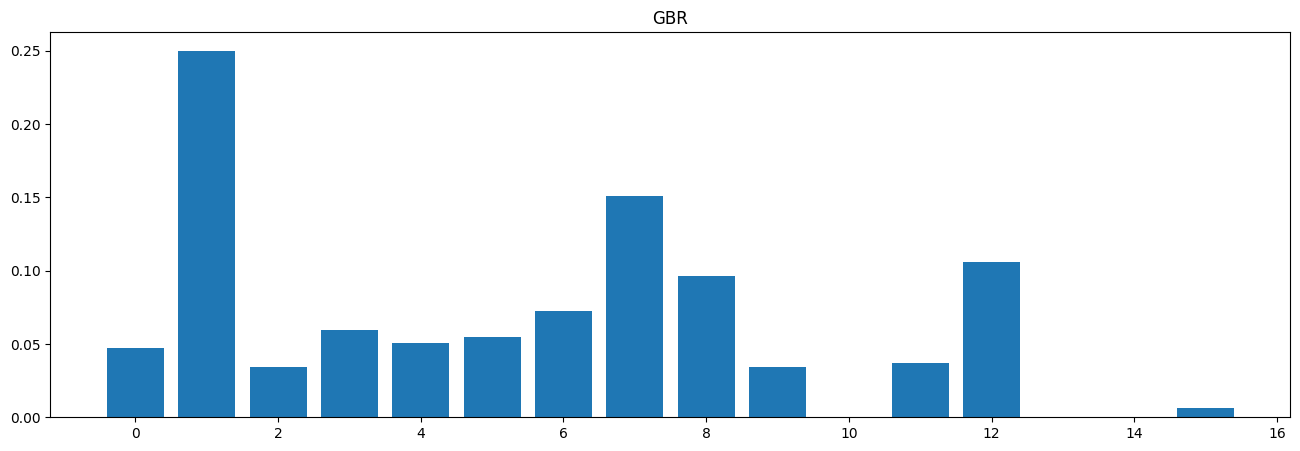

In [246]:
features =Model4.feature_importances_
Columns = list(x.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="GBR")
#plt.xlabel('C (%)','H (%)','N (%)','O (%)','T (°C)','RT (min)','HR (°C/min)')
plt.bar([x for x in range(len(features))],features)
plt.show()

[Text(0, 0, 'Temperature (C)'),
 Text(1, 0, 'pH'),
 Text(2, 0, 'VF Area (m2)'),
 Text(3, 0, 'HF Area (m2)'),
 Text(4, 0, 'HRT (d)'),
 Text(5, 0, 'HLR (L/m2d)'),
 Text(6, 0, 'Q (flow) (m3/d)'),
 Text(7, 0, 'Influent Conc. (mg/L)'),
 Text(8, 0, 'Type of Wastewater_Aquaculture'),
 Text(9, 0, 'Type of Wastewater_Cheese'),
 Text(10, 0, 'Type of Wastewater_Domestic Wastewater'),
 Text(11, 0, 'Type of Wastewater_Landfill leachate'),
 Text(12, 0, 'Type of Wastewater_Sewage'),
 Text(13, 0, 'Type of Wastewater_Slaughter House'),
 Text(14, 0, 'Type of Wastewater_Tannery'),
 Text(15, 0, 'Type of Wastewater_Winery')]

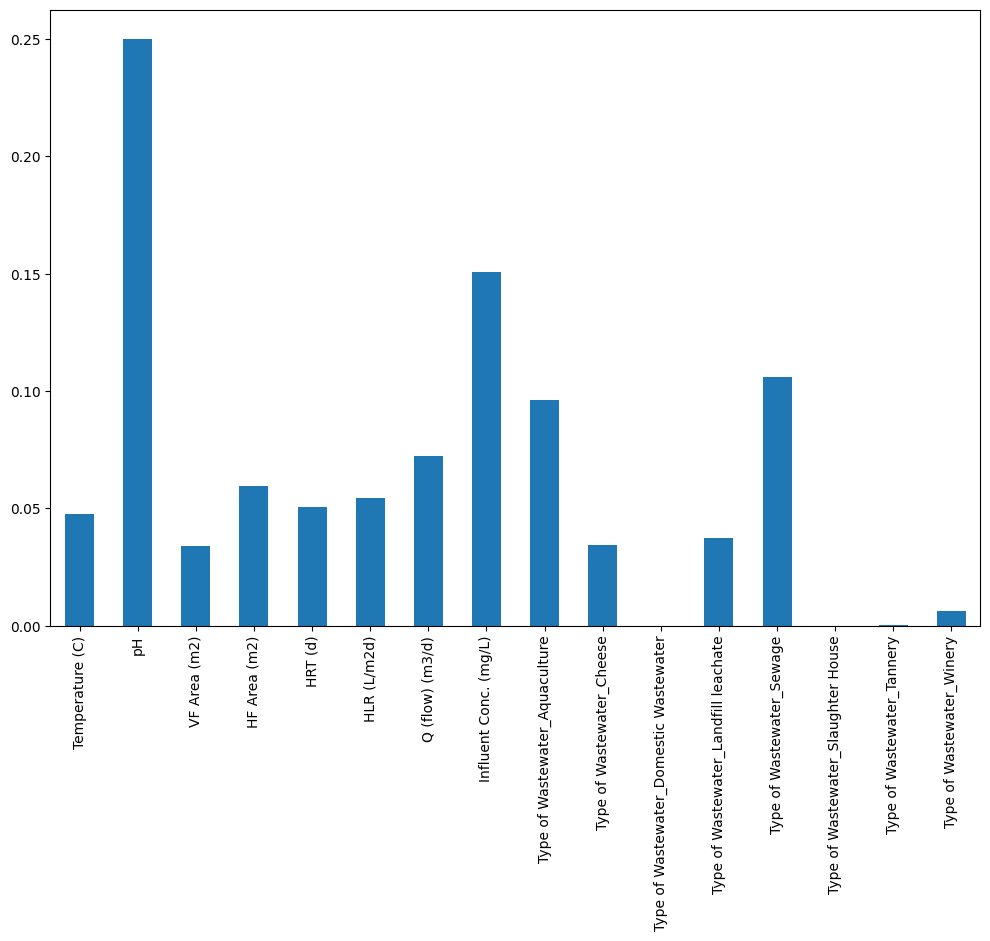

In [247]:
import matplotlib.pyplot as plt
%matplotlib inline

frequencies = []
x_labels = []
Columns = list(x.columns)
for i,j in enumerate(features):
    frequencies.append(j)
    x_labels.append(Columns[i])

freq_series = pd.Series(frequencies)


# Plot the figure.
plt.figure(figsize=(12, 8))
fig = freq_series.plot(kind='bar')
fig.set_xticklabels(x_labels)